# Nettoyer le jeu ***suite***

~~~~
Capteur:
* InletTemp-sensor
* SetTemp-sensor
* Drive-sensor
* Mode-sensor
~~~~

### 1. Nettoyer le jeu
* [x] Exploration des colonnes et drop des non nécessaires
* [x] Noter les intervalles ou listes pour chaque capteur
* [x] Features engineering (transformation des dates, merges, etc...)
* [x] Exclure les outliers n'étant pas dans les intervalles ou listes
* [x] Vérifier la présence de doublons
* [x] Exploration des données
* [x] API météo?

### 2. Modèle ML
* Modèle de Régression:
  * RandomTreeRegressor
  * Gradient Boosting (linéaire, tree)
  * KernelRidge (linéaire, rbf, etc...)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly
from datetime import datetime

pd.set_option("display.max_columns", None)

sensors_datas = pd.read_csv("cleaned_datas_2.csv")

sensors_datas

,DataMeasurementId,DateTime,SensorId,Value,Raw,Name,EquipmentId,diff_time
0,1,2021-10-18 10:13:28.415,1,19.1,19.1,InletTemp-sensor,1,NaN
1,2,2021-10-18 10:13:28.446,2,29.0,29.0,SetTemp-sensor,1,0.031
2,3,2021-10-18 10:13:28.469,4,4.0,3005,FanSpeed-sensor,1,0.023
3,4,2021-10-18 10:13:28.481,5,2.0,HEAT,Mode-sensor,1,0.012
4,260,2021-10-18 11:34:33.376,1,19.2,19.2,InletTemp-sensor,1,4864.895
...,...,...,...,...,...,...,...,...
67818,67958,2021-11-21 13:00:05.206,109,22.3,22.3,InletTemp-sensor,19,1859.899
67819,67959,2021-11-21 13:00:05.217,110,19.0,19.0,SetTemp-sensor,19,0.011
67820,67960,2021-11-21 13:00:05.228,111,0.0,2,Drive-sensor,19,0.011
67821,67962,2021-11-21 13:00:05.249,113,2.0,HEAT,Mode-sensor,19,0.021


In [2]:
s_datas = sensors_datas[sensors_datas["EquipmentId"] == 1].copy()
s_datas["DateTime_H"] = s_datas["DateTime"].astype("<M8[h]")
s_datas["DateTime_m"] = s_datas["DateTime"].astype("<M8[m]")

s_datas

,DataMeasurementId,DateTime,SensorId,Value,Raw,Name,EquipmentId,diff_time,DateTime_H,DateTime_m
0,1,2021-10-18 10:13:28.415,1,19.1,19.1,InletTemp-sensor,1,NaN,2021-10-18 10:00:00,2021-10-18 10:13:00
1,2,2021-10-18 10:13:28.446,2,29.0,29.0,SetTemp-sensor,1,0.031,2021-10-18 10:00:00,2021-10-18 10:13:00
2,3,2021-10-18 10:13:28.469,4,4.0,3005,FanSpeed-sensor,1,0.023,2021-10-18 10:00:00,2021-10-18 10:13:00
3,4,2021-10-18 10:13:28.481,5,2.0,HEAT,Mode-sensor,1,0.012,2021-10-18 10:00:00,2021-10-18 10:13:00
4,260,2021-10-18 11:34:33.376,1,19.2,19.2,InletTemp-sensor,1,4864.895,2021-10-18 11:00:00,2021-10-18 11:34:00
...,...,...,...,...,...,...,...,...,...,...
2853,68008,2021-11-21 14:13:51.486,1,21.3,21.3,InletTemp-sensor,1,660.428,2021-11-21 14:00:00,2021-11-21 14:13:00
2854,68040,2021-11-21 14:50:46.932,1,21.6,21.6,InletTemp-sensor,1,2215.446,2021-11-21 14:00:00,2021-11-21 14:50:00
2855,68063,2021-11-21 15:08:47.641,1,21.8,21.8,InletTemp-sensor,1,1080.709,2021-11-21 15:00:00,2021-11-21 15:08:00
2856,68069,2021-11-21 15:18:48.060,1,21.6,21.6,InletTemp-sensor,1,600.419,2021-11-21 15:00:00,2021-11-21 15:18:00


In [3]:
# Ville
Paris = Point(48.82, 2.34, 75)

# Dates
start_date = datetime(2021, 10, 17)
end_date = datetime(2021, 10, 31)

# Getting datas
meteo_datas = Hourly(Paris, s_datas["DateTime_H"].min(), s_datas["DateTime_H"].max())
meteo_datas = meteo_datas.fetch()

meteo_datas.reset_index()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2021-10-18 10:00:00,12.9,8.8,76.0,0.0,NaN,190.0,9.4,20.4,1022.0,NaN,2.0
1,2021-10-18 11:00:00,14.8,9.8,72.0,0.0,NaN,180.0,13.0,22.2,1022.0,NaN,2.0
2,2021-10-18 12:00:00,16.8,11.5,71.0,0.0,0.0,180.0,9.4,22.0,1021.3,NaN,3.0
3,2021-10-18 13:00:00,18.5,12.5,68.0,0.0,NaN,200.0,11.2,24.1,1020.7,NaN,3.0
4,2021-10-18 14:00:00,18.6,12.4,67.0,0.0,NaN,200.0,14.8,24.1,1020.7,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
817,2021-11-21 11:00:00,8.0,6.6,91.0,0.0,NaN,330.0,5.4,13.0,1014.6,NaN,7.0
818,2021-11-21 12:00:00,8.3,7.1,92.0,0.5,0.0,350.0,7.6,11.0,1014.2,NaN,7.0
819,2021-11-21 13:00:00,8.5,7.7,95.0,0.8,NaN,360.0,7.6,13.0,1013.6,NaN,7.0
820,2021-11-21 14:00:00,8.6,7.7,94.0,0.4,NaN,40.0,13.0,16.7,1013.5,NaN,7.0


In [39]:
for col in meteo_datas.columns:
    nb_null = meteo_datas[col].isnull().sum()
    if nb_null > 0:
        print(f"{col} -- {nb_null}")

snow -- 592
tsun -- 822


In [4]:
df = s_datas.merge(meteo_datas, left_on= "DateTime_H", right_on= "time")

df_cols = [x for x in df["Name"].unique() if x not in ["FanSpeed-sensor", "ErrCode-sensor"]]
df = df[df["Name"].isin(df_cols)].reset_index(drop= True)

df

,DataMeasurementId,DateTime,SensorId,Value,Raw,Name,EquipmentId,diff_time,DateTime_H,DateTime_m,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,1,2021-10-18 10:13:28.415,1,19.1,19.1,InletTemp-sensor,1,NaN,2021-10-18 10:00:00,2021-10-18 10:13:00,12.9,8.8,76.0,0.0,NaN,190.0,9.4,20.4,1022.0,NaN,2.0
1,2,2021-10-18 10:13:28.446,2,29.0,29.0,SetTemp-sensor,1,0.031,2021-10-18 10:00:00,2021-10-18 10:13:00,12.9,8.8,76.0,0.0,NaN,190.0,9.4,20.4,1022.0,NaN,2.0
2,4,2021-10-18 10:13:28.481,5,2.0,HEAT,Mode-sensor,1,0.012,2021-10-18 10:00:00,2021-10-18 10:13:00,12.9,8.8,76.0,0.0,NaN,190.0,9.4,20.4,1022.0,NaN,2.0
3,260,2021-10-18 11:34:33.376,1,19.2,19.2,InletTemp-sensor,1,4864.895,2021-10-18 11:00:00,2021-10-18 11:34:00,14.8,9.8,72.0,0.0,NaN,180.0,13.0,22.2,1022.0,NaN,2.0
4,275,2021-10-18 11:46:33.956,1,19.5,19.5,InletTemp-sensor,1,720.580,2021-10-18 11:00:00,2021-10-18 11:46:00,14.8,9.8,72.0,0.0,NaN,180.0,13.0,22.2,1022.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,68008,2021-11-21 14:13:51.486,1,21.3,21.3,InletTemp-sensor,1,660.428,2021-11-21 14:00:00,2021-11-21 14:13:00,8.6,7.7,94.0,0.4,NaN,40.0,13.0,16.7,1013.5,NaN,7.0
2627,68040,2021-11-21 14:50:46.932,1,21.6,21.6,InletTemp-sensor,1,2215.446,2021-11-21 14:00:00,2021-11-21 14:50:00,8.6,7.7,94.0,0.4,NaN,40.0,13.0,16.7,1013.5,NaN,7.0
2628,68063,2021-11-21 15:08:47.641,1,21.8,21.8,InletTemp-sensor,1,1080.709,2021-11-21 15:00:00,2021-11-21 15:08:00,8.5,7.4,93.0,0.1,0.0,30.0,14.8,26.0,1013.8,NaN,7.0
2629,68069,2021-11-21 15:18:48.060,1,21.6,21.6,InletTemp-sensor,1,600.419,2021-11-21 15:00:00,2021-11-21 15:18:00,8.5,7.4,93.0,0.1,0.0,30.0,14.8,26.0,1013.8,NaN,7.0


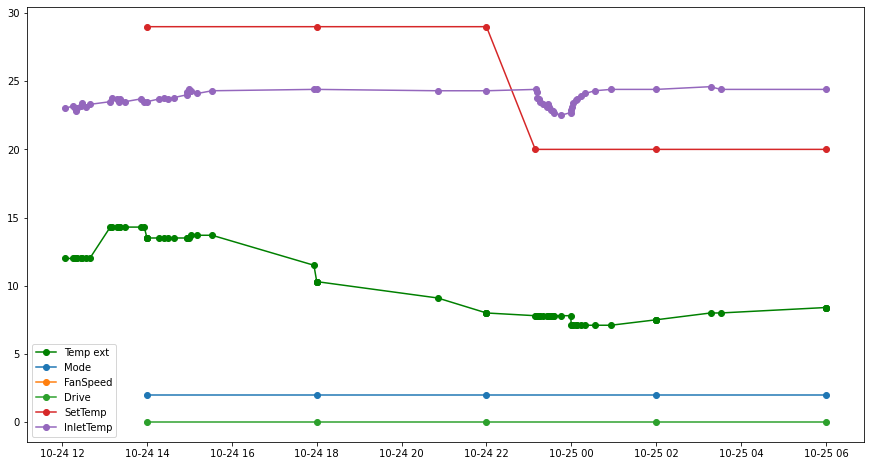

In [207]:
fig = plt.figure(figsize=(15, 8))

time_col = "DateTime_m"
# Dates
start_date = datetime(2021, 10, 24, 12, 0, 0) # df["DateTime_m"].min()
end_date = datetime(2021, 10, 25, 6, 0, 0)

# tmp_inlet = df.loc[(df["SensorId"] == 1) & (df["DateTime_m"] >= start_date) 
#     & (df["DateTime_m"] <= end_date), ["Value", "DateTime_m"]]
tmp_temp = df.loc[(df["DateTime_m"] >= start_date) & (df["DateTime_m"] <= 
    end_date), ["temp", "DateTime_m"]]
    
plt.plot_date(time_col, "temp", data= tmp_temp, ls= "-", c= "g", label= "Temp ext")

labels= ["InletTemp", "SetTemp" , "Drive", "FanSpeed", "Mode"]

for i, label in zip(reversed(range(1, 6)), reversed(labels)):
    capteur = df.loc[(df["SensorId"] == i) & (df["DateTime_m"] >= start_date) 
        & (df["DateTime_m"] <= end_date), ["Value", "DateTime_m"]]
    plt.plot_date("DateTime_m", "Value", data= capteur, ls= "-", label= label)

plt.legend()
plt.show()

In [209]:
df[(df["DateTime_m"] >= datetime(2021, 10, 24, 13, 0, 0)) & (df["DateTime_m"] 
    <= datetime(2021, 10, 25, 6, 0, 0))][:50]

,DataMeasurementId,DateTime,SensorId,Value,Raw,Name,EquipmentId,diff_time,DateTime_H,DateTime_m,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
560,12944,2021-10-24 13:08:08.599,1,23.5,23.5,InletTemp-sensor,1,1741.129,2021-10-24 13:00:00,2021-10-24 13:08:00,14.3,6.9,61.0,0.0,NaN,230.0,7.6,18.5,1022.0,NaN,1.0
561,12950,2021-10-24 13:11:08.704,1,23.8,23.8,InletTemp-sensor,1,180.105,2021-10-24 13:00:00,2021-10-24 13:11:00,14.3,6.9,61.0,0.0,NaN,230.0,7.6,18.5,1022.0,NaN,1.0
562,12970,2021-10-24 13:17:14.958,1,23.7,23.7,InletTemp-sensor,1,366.254,2021-10-24 13:00:00,2021-10-24 13:17:00,14.3,6.9,61.0,0.0,NaN,230.0,7.6,18.5,1022.0,NaN,1.0
563,12979,2021-10-24 13:20:15.084,1,23.5,23.5,InletTemp-sensor,1,180.126,2021-10-24 13:00:00,2021-10-24 13:20:00,14.3,6.9,61.0,0.0,NaN,230.0,7.6,18.5,1022.0,NaN,1.0
564,12988,2021-10-24 13:22:09.152,1,23.7,23.7,InletTemp-sensor,1,114.068,2021-10-24 13:00:00,2021-10-24 13:22:00,14.3,6.9,61.0,0.0,NaN,230.0,7.6,18.5,1022.0,NaN,1.0
565,13003,2021-10-24 13:29:09.435,1,23.5,23.5,InletTemp-sensor,1,420.283,2021-10-24 13:00:00,2021-10-24 13:29:00,14.3,6.9,61.0,0.0,NaN,230.0,7.6,18.5,1022.0,NaN,1.0
566,13052,2021-10-24 13:51:10.233,1,23.7,23.7,InletTemp-sensor,1,1320.798,2021-10-24 13:00:00,2021-10-24 13:51:00,14.3,6.9,61.0,0.0,NaN,230.0,7.6,18.5,1022.0,NaN,1.0
567,13057,2021-10-24 13:56:10.433,1,23.5,23.5,InletTemp-sensor,1,300.200,2021-10-24 13:00:00,2021-10-24 13:56:00,14.3,6.9,61.0,0.0,NaN,230.0,7.6,18.5,1022.0,NaN,1.0
568,13062,2021-10-24 14:00:04.301,1,23.5,23.5,InletTemp-sensor,1,233.868,2021-10-24 14:00:00,2021-10-24 14:00:00,13.5,6.4,62.0,0.0,NaN,210.0,7.6,18.5,1021.5,NaN,1.0
569,13063,2021-10-24 14:00:04.310,2,29.0,29.0,SetTemp-sensor,1,0.009,2021-10-24 14:00:00,2021-10-24 14:00:00,13.5,6.4,62.0,0.0,NaN,210.0,7.6,18.5,1021.5,NaN,1.0


### Transformation du jeu de données

* Table pivot => mise en colonnes des valeurs de chaque capteur
* Agrégation sur le nouveau jeu des données météo "temp", "rhum", "prcp", "wspd", "wpgt", "pres"

In [15]:
pivot_test = pd.pivot_table(df, values= "Value", index= ["DateTime_m"], columns= ["Name"], aggfunc= np.mean)


In [20]:
drop_test = pivot_test[pivot_test["SetTemp-sensor"].notna()]

drop_test

Name,Drive-sensor,InletTemp-sensor,Mode-sensor,SetTemp-sensor
DateTime_m,,,,
2021-10-18 10:13:00,NaN,19.1,2.0,29.0
2021-10-18 14:00:00,NaN,19.3,2.0,29.0
2021-10-18 18:00:00,NaN,20.2,2.0,29.0
2021-10-18 22:00:00,NaN,20.4,2.0,29.0
2021-10-19 02:00:00,NaN,20.9,2.0,29.0
...,...,...,...,...
2021-11-20 21:02:00,NaN,NaN,NaN,26.0
2021-11-21 01:00:00,0.0,22.5,2.0,25.0
2021-11-21 05:00:00,0.0,22.1,2.0,25.0


In [62]:
# tmp_drop = drop_test.reset_index()
# tmp_drop

tmp_agg_df = df.groupby("DateTime_m")[["temp", "rhum", "prcp", "wspd", "wpgt", "pres"]].mean()
# tmp_agg_df

tmp_test = drop_test.merge(tmp_agg_df, left_index= True, right_index= True)

tmp_test.reset_index(inplace= True)


In [189]:
tmp_test[50:100]

,DateTime_m,Drive-sensor,InletTemp-sensor,Mode-sensor,SetTemp-sensor,temp,rhum,prcp,wspd,wpgt,pres
50,2021-10-25 22:00:00,0.0,22.1,2.0,20.0,11.7,94.0,0.0,7.6,11.1,1020.9
51,2021-10-26 02:00:00,0.0,21.6,2.0,20.0,9.9,95.0,0.0,7.6,9.3,1022.0
52,2021-10-26 06:00:00,0.0,21.8,2.0,20.0,8.1,97.0,0.0,7.6,17.0,1023.3
53,2021-10-26 10:00:00,0.0,21.1,2.0,20.0,11.6,89.0,0.0,11.2,20.4,1024.6
54,2021-10-26 14:00:00,0.0,20.6,2.0,20.0,15.3,76.0,0.0,11.2,24.1,1024.1
55,2021-10-26 18:00:00,0.0,20.8,2.0,20.0,13.9,82.0,0.0,9.4,22.0,1025.3
56,2021-10-26 22:00:00,0.0,20.8,2.0,20.0,12.1,87.0,0.0,9.4,16.7,1025.8
57,2021-10-27 02:00:00,0.0,20.4,2.0,20.0,9.9,94.0,0.0,5.4,11.1,1025.6
58,2021-10-27 06:00:00,0.0,19.7,2.0,20.0,8.6,96.0,0.0,7.6,13.0,1025.3
59,2021-10-27 10:00:00,0.0,18.6,2.0,20.0,10.3,90.0,0.0,9.4,14.8,1025.8


In [214]:
truc = pd.to_datetime(tmp_test["DateTime_m"]).view(np.int64) * 10e-9

truc[0]

16345519800.0

Compléter les valeurs nulles

In [63]:
for col in tmp_test.columns:
    nb_null = tmp_test[col].isnull().sum()
    if nb_null > 0:
        print(f"{col} -- {nb_null}")

Drive-sensor -- 80
InletTemp-sensor -- 54
Mode-sensor -- 61


In [197]:
f_datas = tmp_test.copy()


for col in tmp_test.columns:
    # Il faut traiter la colonne de temps différemment des autres
    if tmp_test[col].dtypes == "<M8[ns]":
        date_col_bool = True
        tmp_df = pd.Series(pd.to_datetime(tmp_test[col]).values.astype(
            np.int64) * 10e-9)
    else:
        date_col_bool = False
        tmp_df = tmp_test[col]
    for i in range(len(tmp_df)):
        if i == 0 and np.isnan(tmp_df[i]):
            tmp_values = tmp_df[tmp_df.notna()].reset_index(drop= True)
            f_datas.loc[i, col] = tmp_values[0]
        else:
            if i > 0 and np.isnan(tmp_df[i]):
                f_datas.loc[i, col] = f_datas.loc[i -1, col]


In [198]:
for col in f_datas.columns:
    nb_null = f_datas[col].isnull().sum()
    if nb_null > 0:
        print(f"{col} -- {nb_null}")

In [210]:
f_datas

,DateTime_m,Drive-sensor,InletTemp-sensor,Mode-sensor,SetTemp-sensor,temp,rhum,prcp,wspd,wpgt,pres
0,2021-10-18 10:13:00,0.0,19.1,2.0,29.0,12.9,76.0,0.0,9.4,20.4,1022.0
1,2021-10-18 14:00:00,0.0,19.3,2.0,29.0,18.6,67.0,0.0,14.8,24.1,1020.7
2,2021-10-18 18:00:00,0.0,20.2,2.0,29.0,16.6,82.0,0.0,5.4,18.0,1021.3
3,2021-10-18 22:00:00,0.0,20.4,2.0,29.0,15.6,93.0,0.2,11.2,24.1,1021.0
4,2021-10-19 02:00:00,0.0,20.9,2.0,29.0,15.5,93.0,0.0,5.4,24.1,1020.6
...,...,...,...,...,...,...,...,...,...,...,...
283,2021-11-20 21:02:00,0.0,21.4,2.0,26.0,6.4,92.0,0.0,5.4,17.0,1020.3
284,2021-11-21 01:00:00,0.0,22.5,2.0,25.0,6.7,90.0,0.0,3.6,11.1,1017.9
285,2021-11-21 05:00:00,0.0,22.1,2.0,25.0,6.4,93.0,0.1,5.4,14.8,1016.0
286,2021-11-21 09:00:00,0.0,21.6,2.0,25.0,6.9,95.0,0.0,5.4,11.0,1015.1


<AxesSubplot:>

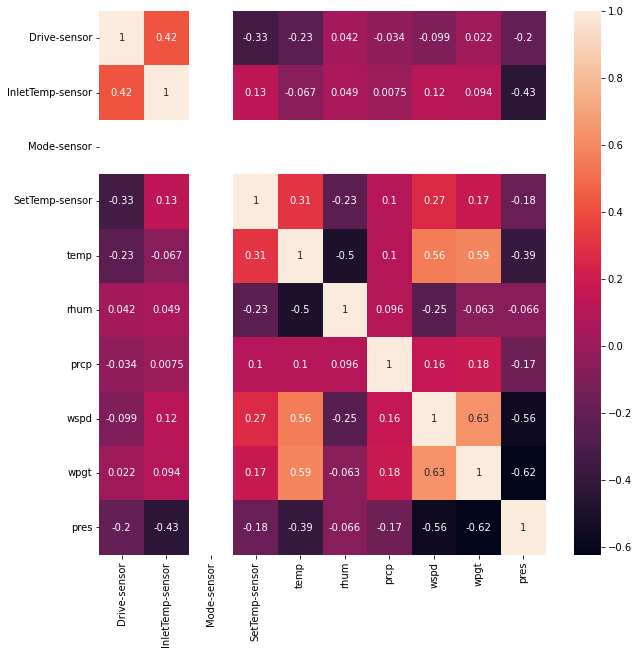

In [205]:
import seaborn as sns

fig= plt.figure(figsize=(10, 10))

sns.heatmap(f_datas.corr(), annot= True)